* Ссылки 
  * [Разведочный анализ данных](https://www.kaggle.com/emstrakhov/eda-with-pandas).<br>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Kaggle/Titanic/train.csv')

In [2]:
df.shape

(891, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

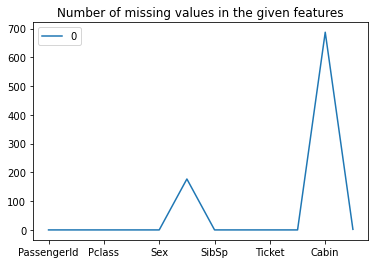

In [4]:
#Проверка на недостающие значения
pd.DataFrame(df.isnull().sum()).plot.line().set_title("Number of missing values in the given features")
df.isnull().sum()

In [ ]:
#Тепловая карта пропущенных значений
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [ ]:
#Проверка на уникальные значения
df.nunique()

In [ ]:
#Статистика по всем
df.describe(include="all")

In [ ]:
#Проверка уникальных значений в колонке
print( df.Data.unique() )

In [ ]:
#Транспонируем, если колонок много
df.head(10).T

In [ ]:
#Выбираем из матрицы интересующую нас ячейку
first_patient = df.loc[0, 'data']

In [ ]:
#Выбираем срез из матрицы по интересующим нас колонкам 
df.loc[:10, ["data1", "data2"]]

In [ ]:
#Строим график по распределению значений в колонке
(df.Data.value_counts(normalize=True) * 100).plot.barh().set_title(
    "Training Data - Percentage of people survived and Deceased")

In [ ]:
#Круговая диаграмма распределения значений в колонке
df.Data.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], 
                                                         loc='center right', 
                                                         bbox_to_anchor=(2.25, 0.5)
                                                        ).set_title("Training Data - People travelling in different classes")

In [ ]:
#График сравнения значений в колонках по дополнительному признаку из другой колонки. В процентах

data1 = round((df[df.Data == 1].Survived == 1).value_counts()[1]/len(df[df.Data == 1]) * 100, 2)
data2 = round((df[df.Data == 2].Survived == 1).value_counts()[1]/len(df[df.Data == 2]) * 100, 2)
data3 = round((df[df.Data == 3].Survived == 1).value_counts()[1]/len(df[df.Data == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": data1,"Class 2": data2, "Class 3": data3},  
     "Percentage Not Survived":{"Class 1": 100-data1,"Class 2": 100-data2, "Class 3": 100-data3}})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")

In [ ]:
#Вероятностная гистограмма 
df['data'].hist(density=True, bins=60)
#Сравнение гистограмм
df.groupby('data')['data'].plot.hist(alpha=.6)
plt.legend()

In [ ]:
#Быстрая проверка по интересующим нас данным. Перебор -> результат
age = df['Age']
age[age < 22].shape[0]

In [ ]:
#В случае очевидного смешения двух нормальных распределений, можно оценить их более подробно
df.groupby('data')['data'].plot.hist(alpha=0.6)
df.groupby('data')['data'].plot.hist(density=True) #Нормализованный вариант
plt.legend(loc='upper left')

In [ ]:
sns.boxplot(x=df['Age']);

In [ ]:
#Первый признак разбивает на классы, второй дает среднее значение параметра по группе
df.groupby('Survived')['Age'].mean().round().plot(kind='bar') 
plt.ylabel('Age') # добавляем подпись на оси Оу
plt.show();

In [ ]:
#Матрица диаграмм рассеивания: комплексное сравнение по нескольким переменным. Диагональ - ядерная оценка плотности
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df,               
               figsize=(6, 6), #размер картинки
               diagonal='kde', #плотность вместо гистограммы на диагонали
               c=df['data'].replace(colors),  #цвета классов
               alpha=0.2 #степень прозрачности точек
              )

In [ ]:
#Подробное распределение внутри класса по определенным параметрам
plt.figure(figsize=(15, 8)) # увеличим размер картинки
sns.countplot(y='Age', hue='Survived', data=df);

In [ ]:
#Scatter для исследования пар числовых признаков
plt.scatter(df['Sex'], df['Pclass']);
#Для изучения совместного распределения двух числовых признаков
sns.jointplot(x='height', y='weight', data=df);

In [ ]:
#Для исследования трёх и более признаков сводные таблицы (pivot tables)
#Index - признаки, по которым выполняется группировка. Values - признаки, по которым вычисляются значения функции
df.pivot_table(values=['age', 'cardio'], index=['smoke', 'alco'], aggfunc='mean')

In [ ]:
#кросс-таблица (таблица сопряжённости)
pd.crosstab(df['smoke'], df['alco'])

In [ ]:
#Средние показатель выборки по определенному параметру
df[df['Survived'] == 1]['Age'].mean()

#Условие может быть составным
df[(df['Survived'] == 1) & (df['Sex'] == "male")]['Age'].mean()